In [ ]:
import fine_tunned_bert

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split

# Neural Net classifier 
import tensorflow as tf 

from tensorflow.keras import metrics 
from sklearn.metrics import confusion_matrix

from sklearn import metrics


In [6]:
df= pd.read_csv('./data/positive_emotion_dataset.csv').drop(columns='Unnamed: 0')
df

,ad,pos_emo
0,i am proud and excited to be your mayor\nalex ...,1
1,proud to work with rep andy kim to secure mil...,1
2,in recent days i have received many questions ...,1
3,this is a fantastic idea we need to stopkavan...,1
4,in these deeply divided times connecting commu...,1
...,...,...
19995,from maggie thatcher to theresa may i know whi...,0
19996,vote is available in many areas across north ...,0
19997,you have to register before you can vote,0
19998,dana balter would put washington bureaucrats i...,0


In [3]:
bert_model_name='small_bert/bert_en_uncased_L-4_H-512_A-8'

In [7]:
# build test and training datasets 
cleaned_train, cleaned_test, y_train, y_test = train_test_split(df['ad'], df['pos_emo'] , test_size = 0.2, random_state = 42 , shuffle = True)
cleaned_train, cleaned_val, y_train, y_val = train_test_split(cleaned_train, y_train,  test_size=0.25, random_state= 42, shuffle = True)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(  (cleaned_train,y_train) ).batch(32)
val_data = tf.data.Dataset.from_tensor_slices( (cleaned_val,y_val) ).batch(32)
test_data = tf.data.Dataset.from_tensor_slices( (cleaned_test,y_test) ).batch(32)

In [ ]:
# create the fine_tunned_model
bert_model = fine_tunned_bert.create_fine_tunned_bert(train_data,bert_model_name=bert_model_name)

# training the model
history = bert_model.fit(x=train_data,epochs =5,validation_data = val_data,verbose=False)

In [13]:
# evaluation 
scores = bert_model.evaluate(test_data)
print("-----------------------------------------")

predictions=bert_model.predict(cleaned_test)
results = (predictions>0.5)*1

tn, fp, fn, tp = confusion_matrix(y_test,results).ravel()

print("Fold cofusion matrix")
print((tn, fp, fn, tp))
print("-----------------------------------------")

125/125 [==============================] - 25s 200ms/step - loss: 0.1654 - accuracy: 0.9585 - precision: 0.9621 - recall: 0.9554 - auc: 0.9839
-----------------------------------------
Fold cofusion matrix
(1907, 76, 90, 1927)
-----------------------------------------


In [14]:
# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))

print(metrics.classification_report(y_test, results, target_names=[ 'no-pos_emo', 'pos_emo']))

skplt.metrics.plot_confusion_matrix(y_test, results , normalize=True)
plt.show()

125/125 [==============================] - 25s 203ms/step - loss: 0.1654 - accuracy: 0.9585 - precision: 0.9621 - recall: 0.9554 - auc: 0.9839
Accuracy: 95.85%


In [9]:
df_val = pd.read_csv('./data/sample_pos_emo.csv')
df_val

,ad,pos_emo
0,see why everyone is celebrating at hoblit dodg...,1
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,1
3,we have until march 31st to raise money for ou...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
120,blood donation saves lives\nthis cannot be sai...,0
121,over 10000 palestinians have been forced left ...,0
122,palestine emergency appeal 53 palestinians inc...,0
123,let is build cameroon wake up cameroonians and...,1


In [24]:
test_data = tf.data.Dataset.from_tensor_slices( (df_val['ad'],df_val['pos_emo']) ).batch(32)
# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))



4/4 [==============================] - 1s 335ms/step - loss: 1.9411 - accuracy: 0.7440 - precision: 0.3810 - recall: 0.2963 - auc: 0.6379
Accuracy: 74.40%


confusion matrix:
[[85 13]
 [19  8]]



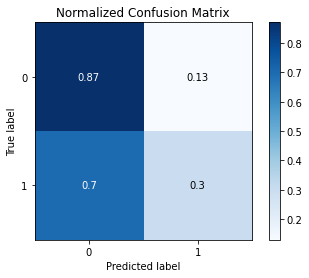

In [26]:
pred_ =  bert_model.predict(df_val['ad'])
df_val['predicted'] = [1 if prob > 0.5 else 0 for prob in pred_]

print("confusion matrix:")
print(metrics.confusion_matrix(df_val['pos_emo'], df_val['predicted']))
print()

skplt.metrics.plot_confusion_matrix(df_val['pos_emo'], df_val['predicted'], normalize=True)
plt.show()

In [27]:
print(metrics.classification_report(df_val['pos_emo'], df_val['predicted'], target_names=[ 'no-pos', 'pos']))

              precision    recall  f1-score   support

      no-pos       0.82      0.87      0.84        98
         pos       0.38      0.30      0.33        27

    accuracy                           0.74       125
   macro avg       0.60      0.58      0.59       125
weighted avg       0.72      0.74      0.73       125

